In [31]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import numpy as np

In [44]:
train_data = pd.read_csv(r"C:/01 Projects/07 Personal_Projects/06 Hackathon/01_WNS_Analytics_Wizard/train_NA17Sgz/train.csv")
train_data.shape

(237609, 7)

In [45]:
train_data.head()

,impression_id,impression_time,user_id,app_code,os_version,is_4G,is_click
0,c4ca4238a0b923820dcc509a6f75849b,2018-11-15 00:00:00,87862,422,old,0,0
1,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,latest,1,1
2,70efdf2ec9b086079795c442636b55fb,2018-11-15 00:02:00,71748,259,intermediate,1,0
3,8e296a067a37563370ded05f5a3bf3ec,2018-11-15 00:02:00,69209,244,latest,1,0
4,182be0c5cdcd5072bb1864cdee4d3d6e,2018-11-15 00:02:00,62873,473,latest,0,0


In [48]:
train_data.describe()

,user_id,app_code,is_4G,is_click
count,237609.000000,237609.000000,237609.000000,237609.000000
mean,46454.526828,249.099971,0.361312,0.045714
std,26802.726666,135.213609,0.480382,0.208864
min,0.000000,0.000000,0.000000,0.000000
25%,23197.000000,163.000000,0.000000,0.000000
50%,46597.000000,213.000000,0.000000,0.000000
75%,69684.000000,385.000000,1.000000,0.000000
max,92586.000000,522.000000,1.000000,1.000000


0    7020
1    3842
Name: is_4G, dtype: int64
0    144738
1     82009
Name: is_4G, dtype: int64


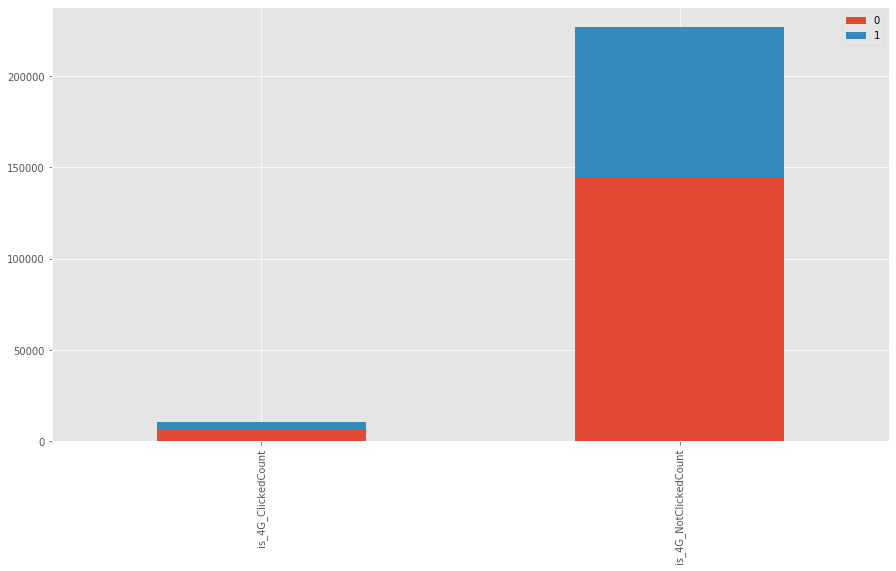

In [51]:
is_4G_ClickedCount = train_data[train_data['is_click']==1]['is_4G'].value_counts()
print(is_4G_ClickedCount)
is_4G_NotClickedCount = train_data[train_data['is_click']==0]['is_4G'].value_counts()
print(is_4G_NotClickedCount)
df = pd.DataFrame([is_4G_ClickedCount,is_4G_NotClickedCount])
df.index = ['is_4G_ClickedCount','is_4G_NotClickedCount']
df.plot(kind='bar',stacked=True, figsize=(15,8))

In [52]:
train_data["os_version"].unique()

array(['old', 'latest', 'intermediate'], dtype=object)

latest          5382
intermediate    2875
old             2605
Name: os_version, dtype: int64
latest          123834
intermediate     52668
old              50245
Name: os_version, dtype: int64


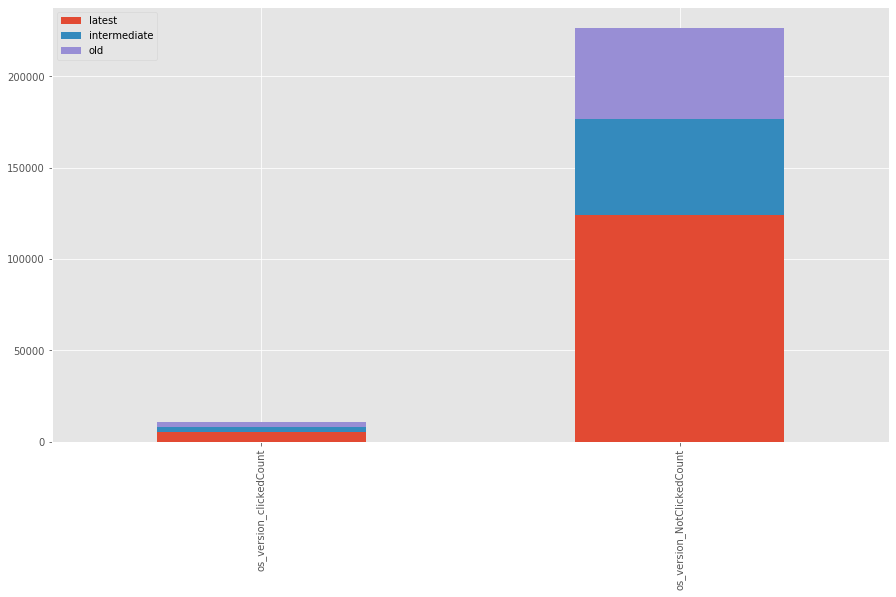

In [53]:
os_version_clickedCount = train_data[train_data['is_click']==1]['os_version'].value_counts()
print(os_version_clickedCount)
os_version_NotClickedCount = train_data[train_data['is_click']==0]['os_version'].value_counts()
print(os_version_NotClickedCount)
df = pd.DataFrame([os_version_clickedCount,os_version_NotClickedCount])
df.index = ['os_version_clickedCount','os_version_NotClickedCount']
df.plot(kind='bar',stacked=True, figsize=(15,8))

In [55]:
len(train_data["app_code"].unique())

490

263
207    33306
386    30458
190    16700
127    10274
371     8656
3       8555
296     6879
129     6715
385     6638
32      5718
5       5006
249     4784
469     4712
283     4356
44      4319
244     3830
242     3390
145     3382
213     2535
463     2425
359     2345
318     2130
231     2093
465     2063
151     2060
202     2018
508     1686
163     1508
38      1452
37      1331
       ...  
152        1
474        1
284        1
281        1
502        1
26         1
147        1
216        1
401        1
376        1
363        1
267        1
28         1
140        1
84         1
13         1
429        1
269        1
301        1
223        1
212        1
270        1
45         1
341        1
86         1
43         1
497        1
370        1
477        1
72         1
Name: app_code, Length: 480, dtype: int64


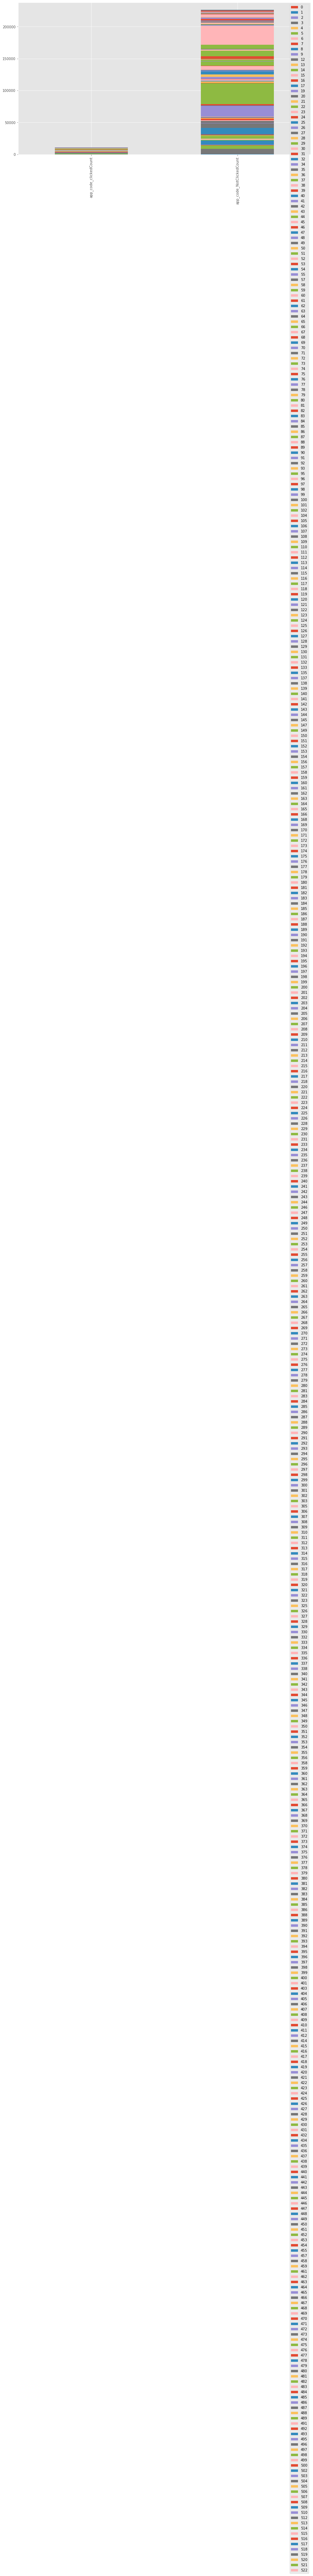

In [60]:
app_code_clickedCount = train_data[train_data['is_click']==1]['app_code'].value_counts()
print(len(app_code_clickedCount))
app_code_NotClickedCount = train_data[train_data['is_click']==0]['app_code'].value_counts()
print(app_code_NotClickedCount)
df = pd.DataFrame([app_code_clickedCount,app_code_NotClickedCount])
df.index = ['app_code_clickedCount','app_code_NotClickedCount']
df.plot(kind='bar',stacked=True, figsize=(15,8))

In [ ]:
app_code_clickedCount = train_data[train_data['is_click']==1]['user_id'].value_counts()
print(len(app_code_clickedCount))

In [62]:
len(train_data["user_id"].unique())

74723

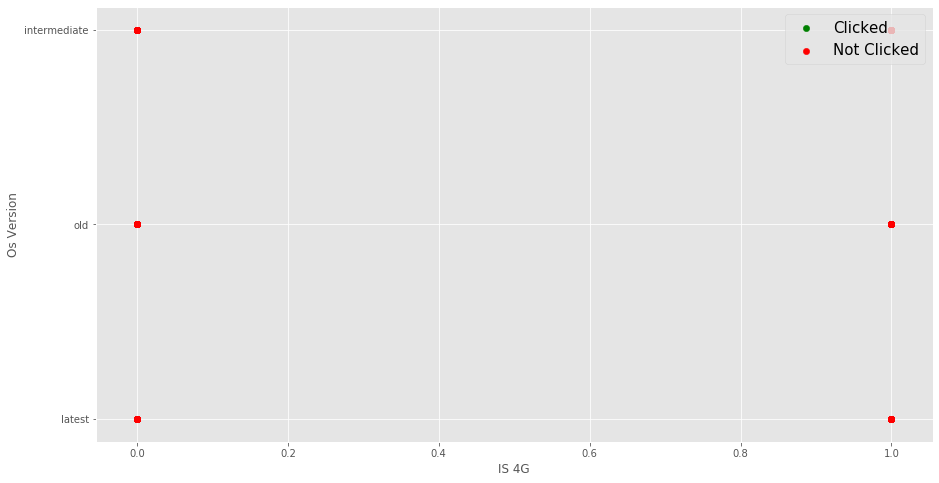

In [64]:
plt.figure(figsize=(15,8))
ax = plt.subplot()
ax.scatter(train_data[train_data['is_click']==1]['is_4G'],train_data[train_data['is_click']==1]['os_version'],c='green',s=40)
ax.scatter(train_data[train_data['is_click']==0]['is_4G'],train_data[train_data['is_click']==0]['os_version'],c='red',s=40)
ax.set_xlabel('IS 4G')
ax.set_ylabel('Os Version')
ax.legend(('Clicked','Not Clicked'),scatterpoints=1,loc='upper right',fontsize=15,)

In [65]:
import calendar

In [66]:
train_data['impression_time'] = pd.to_datetime(train_data['impression_time'])

In [17]:
item_data = pd.read_csv(r"C:\01 Projects\07 Personal_Projects\06 Hackathon\01_WNS_Analytics_Wizard\train_NA17Sgz\item_data.csv")

In [19]:
item_data.head()
item_data.describe()

,item_id,item_price,category_1,category_2,category_3,product_type
count,132761.000000,1.327610e+05,132761.000000,132761.000000,132761.000000,132761.000000
mean,66430.268460,1.082685e+04,9.373852,39.130196,169.060929,5303.063746
std,38354.112949,2.843019e+04,5.193278,21.443609,95.310870,2961.645034
min,0.000000,5.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,33211.000000,1.324000e+03,6.000000,24.000000,85.000000,2874.000000
50%,66433.000000,2.944000e+03,9.000000,40.000000,159.000000,5225.000000
75%,99644.000000,8.544000e+03,13.000000,57.000000,255.000000,7844.000000
max,132865.000000,1.340800e+06,17.000000,79.000000,341.000000,10584.000000


In [67]:
item_data["category_1"].unique()

array([11, 12, 17, 13,  9, 16,  7, 10,  4,  1,  8, 14, 15,  0,  6,  5,  2],
      dtype=int64)

In [68]:
item_data["category_2"].unique()

array([35, 57,  8, 58, 39,  9, 56, 23, 55, 31, 43, 68, 78, 19,  4, 37, 38,
       64, 42, 40, 44, 70, 62, 41, 67,  0, 63, 51,  5,  7, 10, 45, 29, 52,
       61, 74,  6, 24, 76, 27, 14, 77, 46, 28, 17, 69,  3, 18, 49, 71, 33,
       26, 66,  1, 54, 72, 73, 12, 20, 13, 36, 21, 50, 47, 75, 25, 59, 15,
        2, 11, 30, 79, 34, 48, 65, 60, 53, 22, 16], dtype=int64)

In [33]:
item_data["category_3"].unique()

array([ 20,  85, 279, 189, 151,  90, 188,  42, 219,  58, 265, 271, 223,
        40, 137, 171, 149, 113,  47, 134,  17, 213,   6,  48,  62, 263,
       115,  84, 164, 156, 317, 324, 159,  36, 315, 168, 205,  93, 214,
       295, 254, 290, 135, 252, 329, 125, 246,  96,  75, 138, 199, 163,
        73,  44, 187, 132, 292, 145, 256, 100, 273, 191, 220, 148, 305,
        19, 157, 106, 294, 114, 147, 326, 234,  22, 221, 212,  24,  18,
       244,  50,  63, 325, 141, 287, 308, 108, 285, 162, 314, 272, 154,
        15, 341, 304, 240, 173, 198,  60, 210, 291,  95,  12,   5,  54,
       170, 146, 131, 202, 233, 193, 283,   4, 111, 270, 282, 181,  70,
       142, 262,  27, 322, 228, 169,  16, 277, 158, 301, 225,  52, 297,
       280, 318, 119, 226,  72, 269, 338, 336, 229, 323, 253, 257,  65,
       313, 103,  74, 312, 275, 333, 179, 330,  21, 203,   1, 143, 201,
       123,  30, 121, 184, 236,  81, 264, 216,  80,  79, 172, 242, 117,
       139, 182, 306, 235,  32, 238, 194, 328,  83, 293,   9,  8

In [36]:
len(item_data["item_id"].unique())

132761

In [42]:
len(item_data["category_3"].unique())

len(train_data["impression_id"])

237609

In [29]:
view_log_data = pd.read_csv(r"C:\01 Projects\07 Personal_Projects\06 Hackathon\01_WNS_Analytics_Wizard\train_NA17Sgz\view_log.csv")
view_log_data.head()

,server_time,device_type,session_id,user_id,item_id
0,2018-10-15 08:58:00,android,112333,4557,32970
1,2018-10-15 08:58:00,android,503590,74788,7640
2,2018-10-15 08:58:00,android,573960,23628,128855
3,2018-10-15 08:58:00,android,121691,2430,12774
4,2018-10-15 08:58:00,android,218564,19227,28296


In [34]:
view_log_data["device_type"].unique()

array(['android', 'iphone', 'web'], dtype=object)

In [7]:
train_data.shape

(237609, 7)

In [8]:
item_data.shape

(132761, 6)

In [9]:
view_log_data.shape

(3118622, 5)

In [13]:
train_data.describe(include="all")

,impression_id,impression_time,user_id,app_code,os_version,is_4G,is_click
count,237609,237609,237609.000000,237609.000000,237609,237609.000000,237609.000000
unique,237609,36461,NaN,NaN,3,NaN,NaN
top,ef483d16eda6341b69503ebd61c0858e,2018-12-04 00:01:00,NaN,NaN,latest,NaN,NaN
freq,1,46,NaN,NaN,129216,NaN,NaN
mean,NaN,NaN,46454.526828,249.099971,NaN,0.361312,0.045714
std,NaN,NaN,26802.726666,135.213609,NaN,0.480382,0.208864
min,NaN,NaN,0.000000,0.000000,NaN,0.000000,0.000000
25%,NaN,NaN,23197.000000,163.000000,NaN,0.000000,0.000000
50%,NaN,NaN,46597.000000,213.000000,NaN,0.000000,0.000000
75%,NaN,NaN,69684.000000,385.000000,NaN,1.000000,0.000000


In [14]:
view_log_data.describe(include="all")

,server_time,device_type,session_id,user_id,item_id
count,3118622,3118622,3.118622e+06,3.118622e+06,3.118622e+06
unique,82840,3,NaN,NaN,NaN
top,2018-11-14 23:20:00,android,NaN,NaN,NaN
freq,146,3117737,NaN,NaN,NaN
mean,NaN,NaN,5.451129e+05,4.617972e+04,6.605151e+04
std,NaN,NaN,3.147682e+05,2.672813e+04,3.826626e+04
min,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00
25%,NaN,NaN,2.726422e+05,2.312200e+04,3.321900e+04
50%,NaN,NaN,5.454915e+05,4.617700e+04,6.747900e+04
75%,NaN,NaN,8.175090e+05,6.933900e+04,9.927000e+04


In [69]:
view_log_data_modified.shape

NameError: name 'view_log_data_modified' is not defined